# Xarray

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/spyndex/blob/main/docs/tutorials/xarray.ipynb)
![level4](https://raw.githubusercontent.com/davemlz/spyndex/main/docs/_static/level4.png)

Welcome to one of the best levels: Level 4 - `spyndex + xarray`!

Remember to install `spyndex`!

In [ ]:
!pip install -U spyndex

Now, let's start!

First, import `spyndex` and `xarray`:

In [2]:
import spyndex
import xarray as xr

## `xarray.DataArray`

If you're a Remote Sensing scientist, you have probably worked with `xarray` and `Datasets` or `DataArrays`.

Well, well, well... You wnat to use `spyndex` with `xarray`, don't you?

The answer: YES, it is possible!

Let's use a `xarray.DataArray` that is stored in the `spyndex` datasets: `sentinel`:

In [3]:
da = spyndex.datasets.open("sentinel")

This data array is very simple. We have 3 dimensions: `band`, `x` and `y`. Each band is one of the 10 m spectral bands of a Sentinel-2 image.

In [4]:
da

<xarray.DataArray (band: 4, x: 300, y: 300)>
array([[[ 299,  276,  280, ...,  510,  516,  521],
        [ 287,  285,  284, ...,  503,  476,  469],
        [ 287,  292,  288, ...,  454,  411,  337],
        ...,
        [ 502,  508,  520, ...,  683,  670,  791],
        [ 486,  518,  532, ...,  688,  696,  693],
        [ 486,  506,  515, ...,  659,  671,  664]],

       [[ 469,  446,  466, ...,  695,  711,  728],
        [ 469,  437,  469, ...,  683,  694,  666],
        [ 460,  460,  460, ...,  628,  595,  527],
        ...,
        [ 804,  808,  832, ...,  920,  872, 1023],
        [ 787,  803,  822, ...,  890,  882,  871],
        [ 787,  799,  822, ...,  893,  832,  834]],

       [[ 319,  293,  328, ..., 1054, 1090, 1110],
        [ 327,  318,  345, ..., 1044, 1004,  952],
        [ 339,  355,  323, ...,  922,  784,  652],
        ...,
        [1528, 1516, 1516, ..., 1250, 1246, 1420],
        [1470, 1502, 1498, ..., 1316, 1200, 1162],
        [1394, 1480, 1472, ..., 1288, 1144, 1122]],

       [[2164, 2128, 2206, ..., 1796, 1837, 1816],
        [2110, 2017, 2228, ..., 1795, 1839, 1788],
        [2050, 2112, 2062, ..., 1816, 1789, 1864],
        ...,
        [1910, 1942, 1942, ..., 2105, 1898, 2102],
        [1836, 1874, 1916, ..., 2075, 1792, 1747],
        [1778, 1844, 1870, ..., 2087, 1830, 1675]]])
Coordinates:
  * band     (band) <U3 'B02' 'B03' 'B04' 'B08'
Dimensions without coordinates: x, y

The data is stored as `int16`, so let's convert everything to `float`. The scale: 10000.

In [5]:
da = da / 10000

You can easily visualize the image with `rasterio`:

In [6]:
from rasterio import plot

Let's visualize the RGB bands:

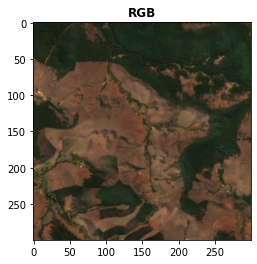

<AxesSubplot:title={'center':'RGB'}>

In [7]:
plot.show((da.sel(band = ["B04","B03","B02"]).data / 0.3).clip(0,1),title = "RGB")

Beautiful image! Now, let's compute the `NDVI` for this image (we already know the bands!)

In [8]:
NDVI = spyndex.computeIndex("NDVI",{"N": da.sel(band = "B08"),"R": da.sel(band = "B04")})

Let's check the result:

In [9]:
print(f"NDVI type: {type(NDVI)}")

NDVI type: <class 'xarray.core.dataarray.DataArray'>


That's right: a `xarray.DataArray`!

Let's visualize it:

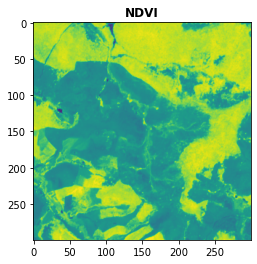

<AxesSubplot:title={'center':'NDVI'}>

In [10]:
plot.show(NDVI,title = "NDVI")

Now, let's compute something a little bit harder... the `kNDVI`!

In [11]:
spyndex.indices.kNDVI

kNDVI: Kernel Normalized Difference Vegetation Index (attributes = ['bands', 'contributor', 'date_of_addition', 'formula', 'long_name', 'reference', 'short_name', 'type'])

What bands do we need?

In [12]:
spyndex.indices.kNDVI.bands

('kNN', 'kNR')

What the bear are those!? Those are kernels. How to compute them? Well, `spyndex` is here to help you!

> If you need more information about these kernels, check the [Awesome Spectral Indices](https://github.com/davemlz/awesome-spectral-indices) documentation! ;)

And if you need more info about the `kNDVI`, check the paper:

In [13]:
spyndex.indices.kNDVI.reference

'https://doi.org/10.1126/sciadv.abc7447'

You can easily compute kernels with `spyndex.computeKernel()`. Let's compute the `kNDVI` with the `RBF` kernel:

> Note that for the RBF kernel, k(n,n) = 1.

In [14]:
parameters = {
    "kNN": 1.0,
    "kNR": spyndex.computeKernel(
        kernel = "RBF",
        params = {
            "a": da.sel(band = "B08"),
            "b": da.sel(band = "B04"),
            "sigma": da.sel(band = ["B08","B04"]).mean("band")
        }
    )
}

With the parameters ready we can compute the `kNDVI`!

In [15]:
kNDVI = spyndex.computeIndex("kNDVI",parameters)

Now, let's visualize it!

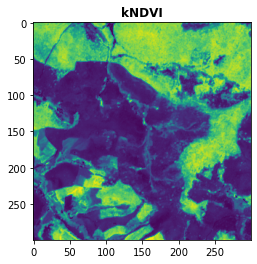

<AxesSubplot:title={'center':'kNDVI'}>

In [16]:
plot.show(kNDVI,title = "kNDVI")

And that's it! You have computed the `kNDVI`! Amazing, right?